In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.image as img

In [2]:
#loading the data into numpy arrays
X = np.load("X.npy")
y = np.load("Y.npy")

In [3]:
#Gathering info about the data
print(X.shape, y.shape)

(2062, 64, 64) (2062, 10)


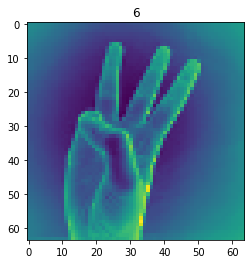

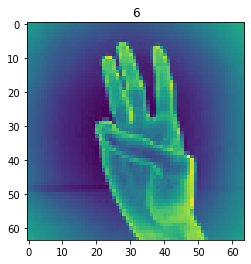

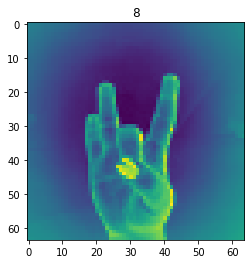

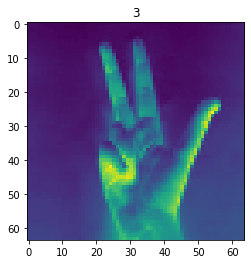

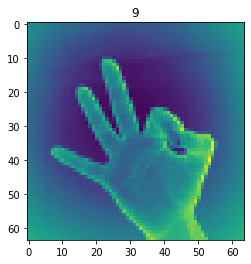

In [4]:
#sampling 5 random images from the dataset
#the titles are the respective digits for the sign language representation

for i in range(5):
    k = np.random.randint(low=0, high=2062)
    plt.imshow(X[k,:,:])
    plt.title(np.argmax(y[k,:]))
    plt.show()

In [5]:
#reshaping X from (2062,64,64)->(2062,4096) for compatibility purposes
X = X.reshape(X.shape[0], 4096)

In [6]:
#creating the NN model

model = Sequential(
    [
        tf.keras.Input(shape=(4096,),),
        Dense(100, activation="relu"),
        Dense(50, activation="relu"),
        Dense(25, activation="relu"),
        Dense(10, activation="linear")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               409700    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 416,285
Trainable params: 416,285
Non-trainable params: 0
_________________________________________________________________


In [7]:
#label is 2D, but TF needs the labels in 1D. Converting the 2d labels in 1D
m = y.shape[0]

for i in range(m):
    y[i,0] = np.argmax(y[i,:])

y = np.delete(y, np.s_[1:10], axis=1)
y = np.asarray(y).reshape(-1)


In [8]:
y.shape

(2062,)

In [9]:
#splitting X and y into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.98)

print(f"Shape of X_train and X_test: {X_train.shape, X_test.shape}")
print(f"Shape of y_train and y_test: {y_train.shape, y_test.shape}")

Shape of X_train and X_test: ((2020, 4096), (42, 4096))
Shape of y_train and y_test: ((2020,), (42,))


In [10]:
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= tf.keras.optimizers.Adam(0.0003)
)

model.fit(X_train, y_train, epochs=300)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 2.2424
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 1.9793
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 1.7093
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 1.5466
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 1.3700
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 1.2621
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 1.1618
Epoch 8/300
64/64 [==============================] - 0s 4ms/step - loss: 1.0758
Epoch 9/300
64/64 [==============================] - 0s 4ms/step - loss: 1.0323
Epoch 10/300
64/64 [==============================] - 0s 4ms/step - loss: 0.9779
Epoch 11/300
64/64 [==============================] - 0s 4ms/step - loss: 0.9141
Epoch 12/300
64/64 [==============================] - 0s 4ms/step - loss: 0.8615
Epoch 13/300
64/64 [=================

In [11]:
pred = tf.nn.softmax(model.predict(X_test)).numpy()

m = pred.shape[0]
c= 0.

for i in range(m):
    if(y_test[i]!=np.argmax(pred[i])):
        c += 1

print(f"Test set error rate: {(c/m)*100}")

2/2 [==============================] - 0s 0s/step
Test set error rate: 9.523809523809524


In [12]:
pred_tr = tf.nn.softmax(model.predict(X_train)).numpy()

m = pred_tr.shape[0]
c=0.

for i in range(m):
    if(y_train[i]!=np.argmax(pred_tr[i])):
        c += 1

print(f"Training set error rate: {(c/m)*100}")

64/64 [==============================] - 0s 2ms/step
Training set error rate: 0.0


The error rate is too high despite using 2020 training examples. With the training set error rate being 0.0 and the test set error rate very high, it is clear that the model is overfitting. One way to combate this would be to collect more data.

Unforunately, provisions for data collection are limited. We can instead perform data augmentation (via image rotations) to create new training examples from the existing set
